In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("results_exp_rotate_mic.csv")

In [3]:
df.iloc[300:310]

,Modelname,Rotated,True,Predicted
300,Linear,0,-1.442571,-1.110826
301,Linear,1,-1.442571,-0.863512
302,Linear,0,-1.442571,-0.967623
303,Linear,1,-1.442571,-0.682300
304,Linear,0,-1.442571,-0.768746
305,Linear,1,-1.442571,-0.851620
306,Linear,0,-1.442571,-0.972151
307,Linear,1,-1.442571,-0.964415
308,Linear,0,-1.442571,-1.196486
309,Linear,1,-1.442571,-0.849054


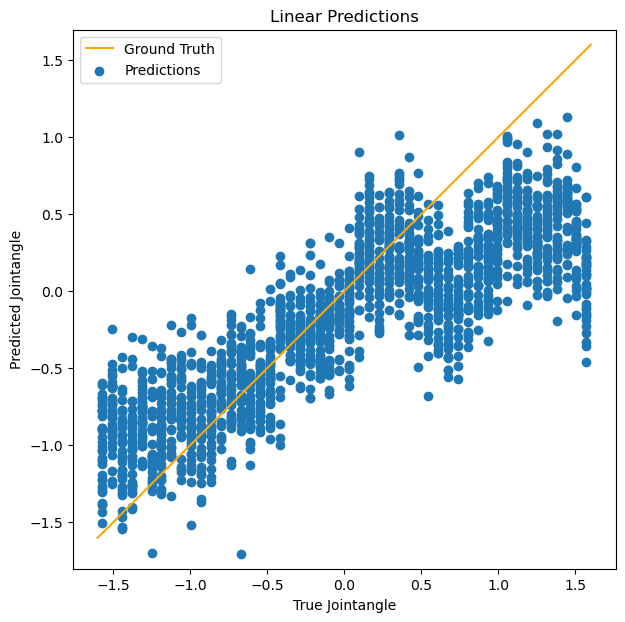

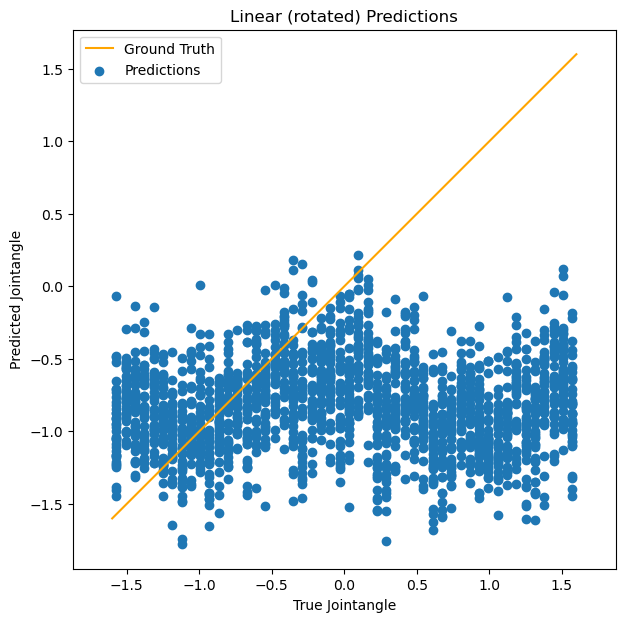

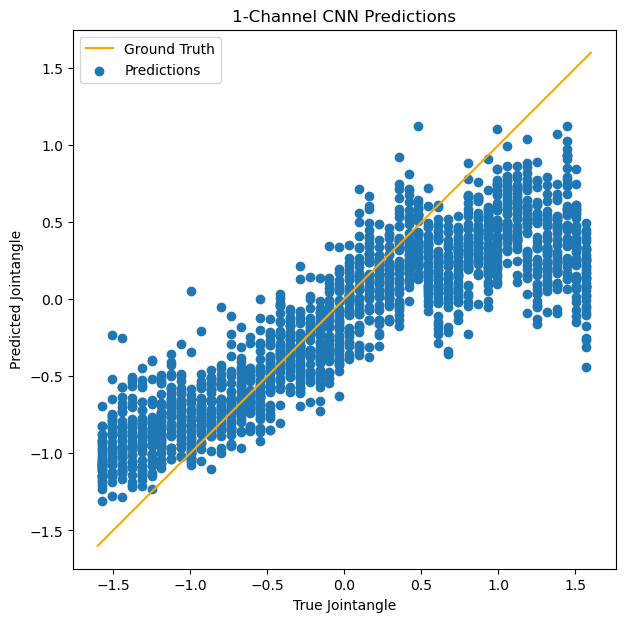

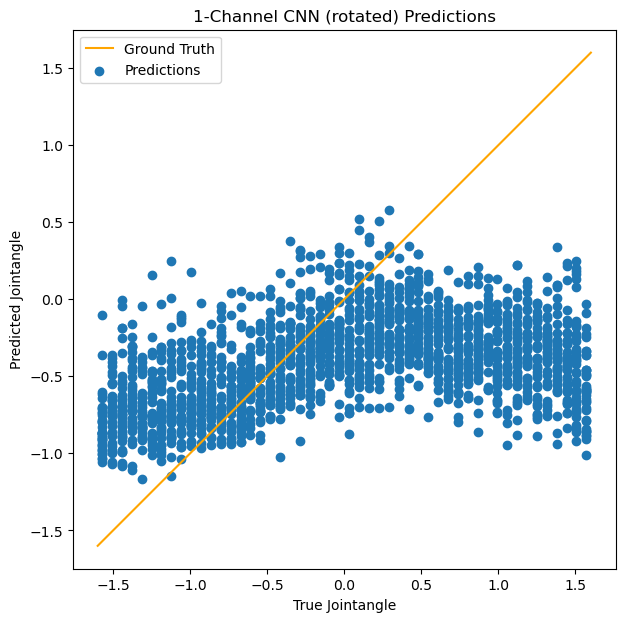

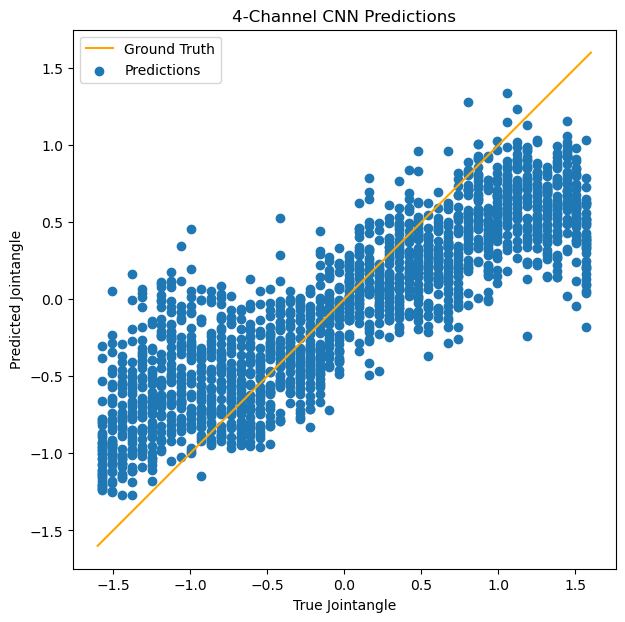

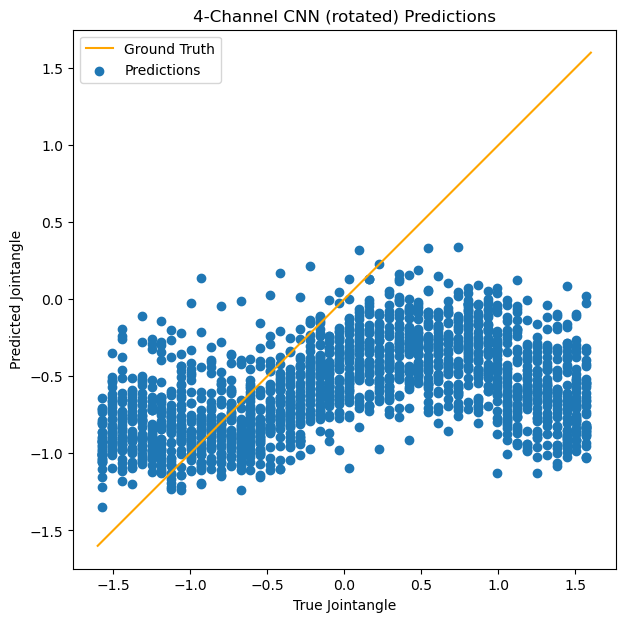

In [4]:
true_vals = df.loc[(df.Modelname == "Linear") & ~(df["True"].isna()) & (df.Rotated == 0), "True"]
pred_vals = df.loc[(df.Modelname == "Linear") & ~(df["True"].isna()) & (df.Rotated == 0), "Predicted"]
def plot_pred(true_vals,pred_vals, name):
    plt.figure(figsize=(7,7))
    plt.plot((-1.6,1.6), (-1.6,1.6), c="orange", label="Ground Truth")
    plt.scatter(true_vals, pred_vals, label="Predictions")
    plt.axis("equal")
    plt.gca().set(xlabel = "True Jointangle")
    plt.ylabel("Predicted Jointangle")
    plt.title(f"{name} Predictions")
    plt.legend()
    plt.show()

for model in df.Modelname.unique():
    for rot in [0, 1]:
        true_vals = df.loc[(df.Modelname == model) & ~(df["True"].isna()) & (df.Rotated == rot), "True"]
        pred_vals = df.loc[(df.Modelname == model) & ~(df["True"].isna()) & (df.Rotated == rot), "Predicted"]
        plot_pred(true_vals, pred_vals, f"{model} (rotated)" if rot else model)

In [15]:
def get_predictions(name, angle, rotated):
    return df.loc[(df.Modelname == name) & (df["True"] == angle) & (df.Rotated == rotated), "Predicted"]

def get_angles(name):
    return np.sort(df.loc[(df.Modelname == name) & ~(df["True"].isna()) & (df.Rotated == 0), "True"].unique())

def make_mse_plot(name):
    errors = []
    rotated_errors = []
    angles = get_angles(name)
    for angle in angles:
        errors.append(np.mean((get_predictions(name, angle, 0) - angle)**2))
        rotated_errors.append(np.mean((get_predictions(name, angle, 1) - angle)**2))

    plt.plot(angles, errors, label="original position")
    plt.plot(angles, rotated_errors, label="rotated position")
    plt.title(f"{name} Mean Square Error")
    plt.ylabel("Mean Sqaure Error [rad]")
    plt.xlabel("Angle [rad]")
    plt.legend()

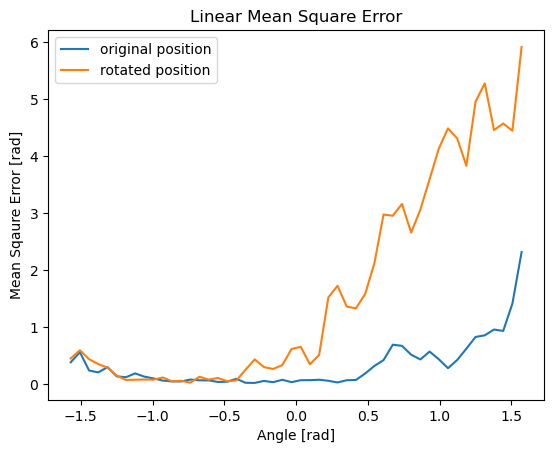

In [16]:
make_mse_plot("Linear")

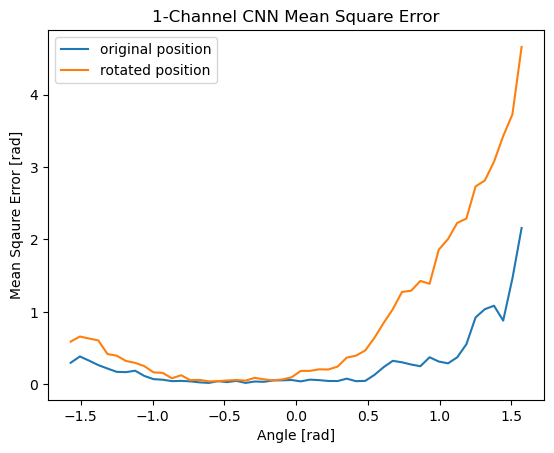

In [17]:
make_mse_plot("1-Channel CNN")

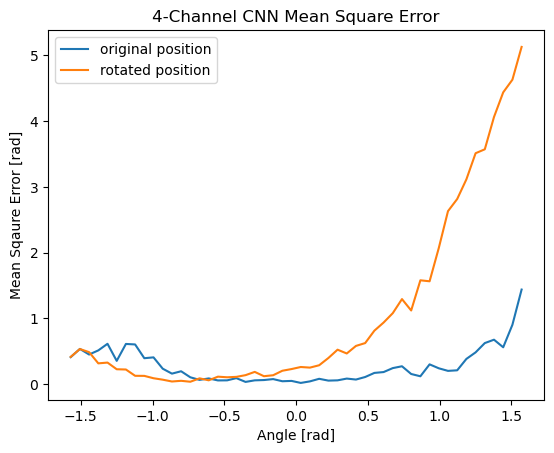

In [18]:
make_mse_plot("4-Channel CNN")